선형 회귀란 종속 변수와 한 개 이상의 독립(설명) 변수와의 선형 상관 관계를 모델링하는 기법이다.
$$ y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \cdots +  \beta_k \cdot x_k + \varepsilon$$
<center> 또는 </center>
$$H(X) = W^TX + b$$
선형 회귀는 회귀계수 $\beta_n$, $W, b$을 추정하는 선형 관계를 가정한 모수적 방법으로, 선형회귀의 목적은 크게 2가지가 있다.
* Predictive Model : 여러 변수들을 가지고 하나의 변수에 대해 예측하려고 할 때(예측력이 중요)
* Explanatory Model : 둘 혹은 여럿 간의 관계를 설명하거나 이해하고자 할 때(종속 변수와 독립 변수 사이의 인과관계가 중요)

# Intro

R의 <code>mlbench</code>패키지에 내장되어 있는 보스턴 지역 주택 가격 데이터로 회귀 분석을 해보자.

In [12]:
# Load library
library(mlbench)

# Load data
data(BostonHousing)
print(head(BostonHousing))

     crim zn indus chas   nox    rm  age    dis rad tax ptratio      b lstat
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90  5.33
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


BostonHusing 데이터 안에 있는 변수들을 사용해 마지막 변수인 medv를 예측하는 선형 회귀를 학습시키는 방법은 다음과 같다.

In [13]:
# Set seed
set.seed(1990)

# Split data
train.id <- sample(1:nrow(BostonHousing), 0.7*nrow(BostonHousing))
train    <- BostonHousing[train.id,]
test     <- BostonHousing[-train.id,]

# Train linear model
lm.fit   <- lm(medv ~ ., data = train)
summary(lm.fit)

# Predict
lm.pred <- predict(lm.fit, newdata = test)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3555  -2.5758  -0.5061   1.6271  23.9439 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.891455   6.114600   4.889 1.57e-06 ***
crim         -0.056719   0.052701  -1.076 0.282584    
zn            0.032611   0.015738   2.072 0.039000 *  
indus         0.020977   0.074259   0.282 0.777739    
chas1         3.523469   0.993306   3.547 0.000444 ***
nox         -18.008866   4.421189  -4.073 5.77e-05 ***
rm            4.508164   0.503789   8.949  < 2e-16 ***
age          -0.006882   0.015732  -0.437 0.662048    
dis          -1.449277   0.240319  -6.031 4.26e-09 ***
rad           0.218833   0.075969   2.881 0.004221 ** 
tax          -0.009500   0.004261  -2.230 0.026433 *  
ptratio      -0.856761   0.152946  -5.602 4.39e-08 ***
b             0.009288   0.003333   2.787 0.005625 ** 
lstat        -0.486639   0.063911  -7.614 2.65e-13 ***
---
Signif. 

각 변수의 회귀 계수에 따라 회귀 식을 구성하면,
$$ \text{medv} = (\text{ } -0.056719 \times \text{crim }) + (\text{ } 0.032611 \times \text{zn }) + \cdots + (\text{ } -0.486639 \times \text{lstat })$$
이 된다. 간단히 해석해보면, 
* crim 변수가 한 단위 증가할 때마다 medv는 0.098797만큼 감소한다.
* zn 변수가 한 단위 증가할 때마다 medv는 0.0348757만큼 증가한다.
* $\vdots$
* lstat 변수가 한 단위 증가할 때마다 medv는 0.618872만큼 감소한다.

선형 회귀 모델을 만들었으면, 이 모델이 적절한 것인지에 대한 검증이 필요하다. 회귀 모형은 기본적으로 여러 가정들을 기반으로 한 통계 모형이기 때문에 이러한 가정을 무시하고 모델을 만들었을 경우, 부정확한 모델이 될 수 있다.

# 오차항 $ \varepsilon$ (Random error term)
오차는 회귀식을 중심으로 무작위하게 흩어져 있는 변동으로, 다음과 같은 가정을 바탕으로 한다.
* $\varepsilon_i$는 정규분포의 형태를 이룬다.
* $\varepsilon_i$의 기대값은 0이다, $E(\varepsilon_i) = 0$. 이 가정은 실제 값이 회귀선 상에 있는 점을 중심으로 분포되어 있다는 뜻이다.
* $\varepsilon_i$의 분산은 모든 $x$에 대해 동일하다, $\sigma^2(\varepsilon_i) = \sigma^2$
* $\varepsilon_i$들은 서로 독립적이다.

![선형회귀도해](https://www.dropbox.com/s/yxan4ive93j4yyn/error%20term.jpg?raw=1)
<center>[이미지 출처](http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis)</center>

오차항 $\varepsilon_i$가 확률변수이므로, $y_i$도 확률변수가 된다. 또한 $E(\varepsilon_i) = 0$이므로
$$E(y_i) = E(\beta_0 + \beta_1x_1 + \cdots + \beta_nx_n + \varepsilon_i) = \beta_0 + \beta_1x_1 + \cdots + \beta_nx_n$$가 된다. 위 식을 모든 x와 y에 대하여 나타내면,
$$E(y) = \beta_0 + \beta_1x_1 + \cdots + \beta_nx_n$$가 되는데 이 것이 바로 회귀 함수가 된다.

## 잔차 $e_i$ (residual)
실제값($y_i$)과 예측값($\hat{y_i}$)의 차이를 잔차라고 한다.
$$e_i = y_i - \hat{y_i}$$
잔차 $e_i$와 오차항$\varepsilon_i$가 어떻게 다른가를 구별하는 것은 중요한데, 모형을 다시 한 번 정리해보면 다음과 같다.
$$y_i = \beta_0 + \beta_1x_1 + \cdots + \beta_kx_k + \varepsilon_i$$
$$y_i = \hat{\beta_0} + \hat{\beta_1}x_1 + \cdots + \hat{\beta_k}x_k + e_i$$
즉,
$$\varepsilon_i = y_i - (\beta_0 + \beta_1x_1 + \cdots + \beta_kx_k)$$
$$e_i = y_i - (\hat{\beta_0} + \hat{\beta_1}x_1 + \cdots + \hat{\beta_k}x_k)$$이다.
위에서 알 수 있듯이 오차항 $\varepsilon_i$는 실제값 $y_i$와 **모집단** 회귀식과의 차이를 말하고, 잔차 $e_i$는 실제값 $y_i$와 **추정** 회귀식과의 편차를 말한다.  
오차항 $\varepsilon_i$는 실제로 알 수 없기 때문에 잔차 $e_i$에 의해 추정된다.

# 선형 회귀에서의 가정
선형 회귀에서는 기본적으로 다음과 같은 4가지 가정을 바탕으로 한다.
* 정규성(Normality) : 평균이 0인 정규분포를 따름, $\varepsilon \text{ ~ } N(0, \sigma^2)$
* 독립성(Independence) : 오차항은 서로 독립
* 선형성(Linearity) : 종속 변수와 독립 변수가 선형 관계
* 등분산성(Homoscedasticity) : 오차항은 모든 $x$에 대해 동일한 분산을 가짐

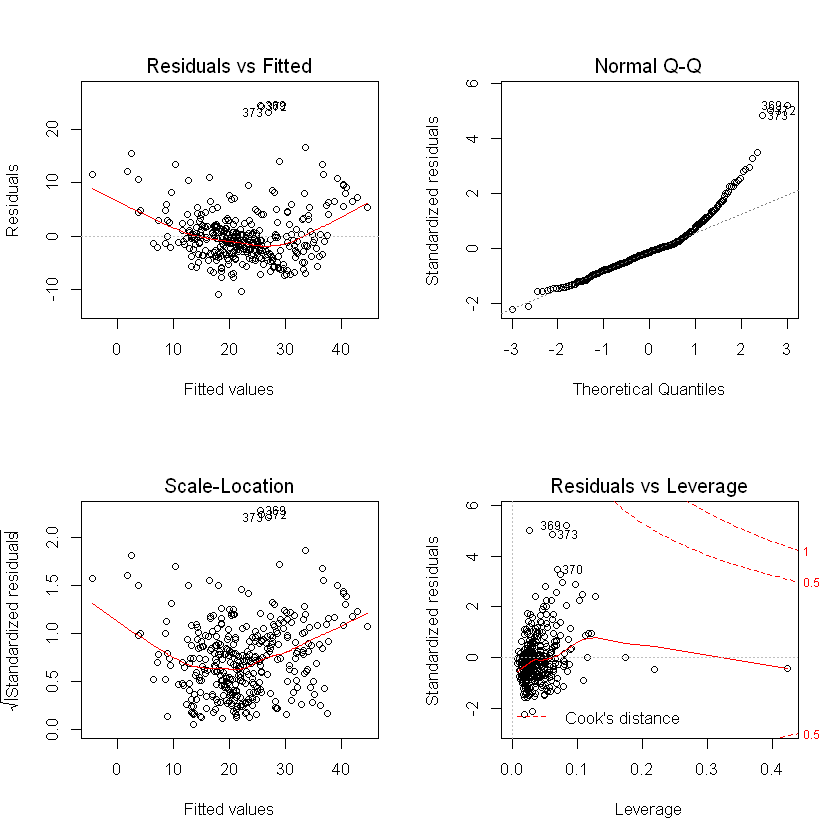

In [4]:
par(mfrow = c(2,2))
plot(lm.fit)

위의 4가지 그래프를 통해 선형 회귀의 기본 가정들에 대한 검증을 할 수 있다.
* Residual vs Fitted : 잔차와 예측값을 산점도로, 독립성과 등분산성 확인 가능
* Normal Q-Q :정규성을 확인 가능
* Scale-Location : 표주화된 잔차와 예측값의 산점도로, REsidual vs Fitted plot과 유사
* Residuals vs Leverage : 표준화된 잔차와 지레값(leverage)의 산점도로, x값과 y값의 이상치 확인 가능

## 정규성
선형 회귀에서는 오차항 $\varepsilon_i$들이 정규분포를 이루고 있어야 한다. 그러므로 잔차 또한 평균이 0인 정규분포를 이루고 있어야 한다. normal Q-Q plot은 표준화된 잔차의 probability plot으로, 만약 잔차가 정규성 가정을 만족한다면 이 그래프의 점들은 45도 각도의 직선 상에 위치해야 한다. R의 <code>car</code> 패키지의 <code>qqPlot()</code>함수는 정규성 가정을 확인하는데 더 정확한 방법을 제공한다.

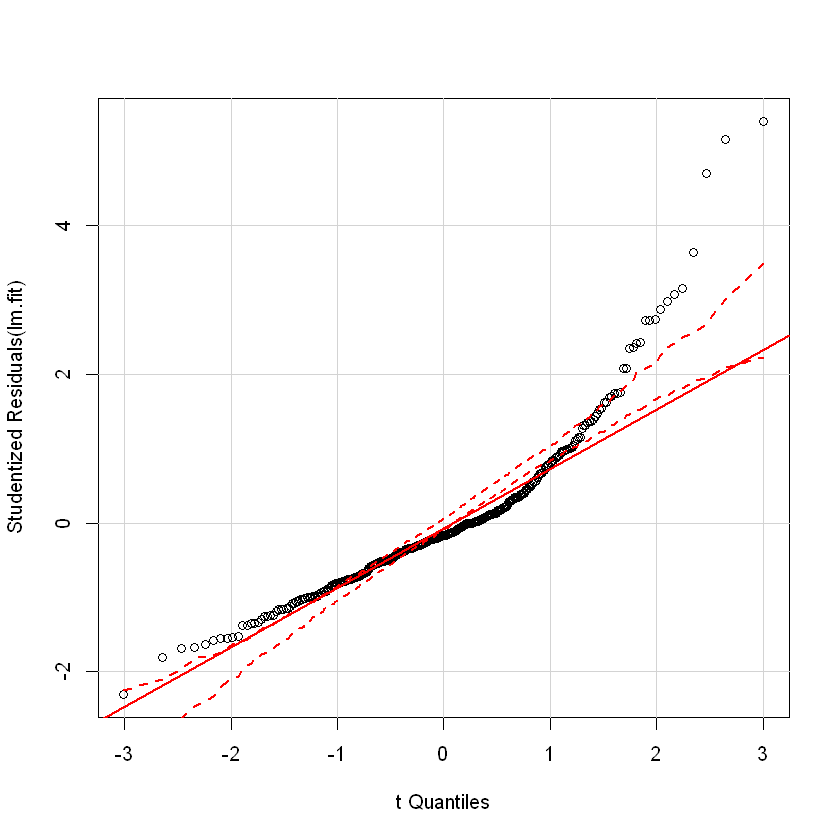

In [4]:
# Load library
library(car)

# Ignore warning
options(warn = -1)

# Plot
qqPlot(lm.fit)

그러나 정규분포가 아니더라도 정규분포에서 크게 벗어나지만 않으면 문제가 생기지 않으므로, 잔차 $e_i$들을 개략적으로 검토하여 정규성을 판단해도 무방하다.

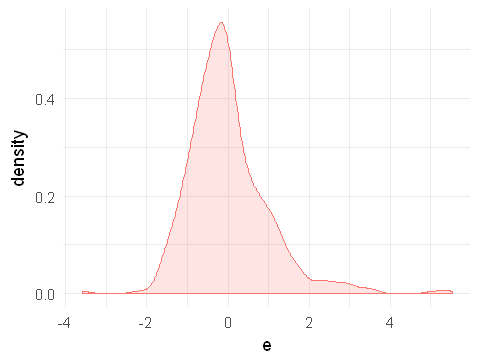

In [62]:
# Load libraries
library(ggplot2)
library(dplyr)

# Control plot size
options(repr.plot.width=4, repr.plot.height=3)

# Calculate residuals
e <- rstandard(lm.fit)

# Plot
data.frame(e = e) %>%
ggplot() + geom_density(aes(e, fill = 'red', col = 'red'), alpha = 0.2) + theme_minimal() + theme(legend.position = "none")

## 독립성
선형 회귀에서는 $\varepsilon_i$들이 서로 독립적이어야 한다. 독립성을 만족하면, 다음 plot에서 어떤 관계가 보이지 않는다. 

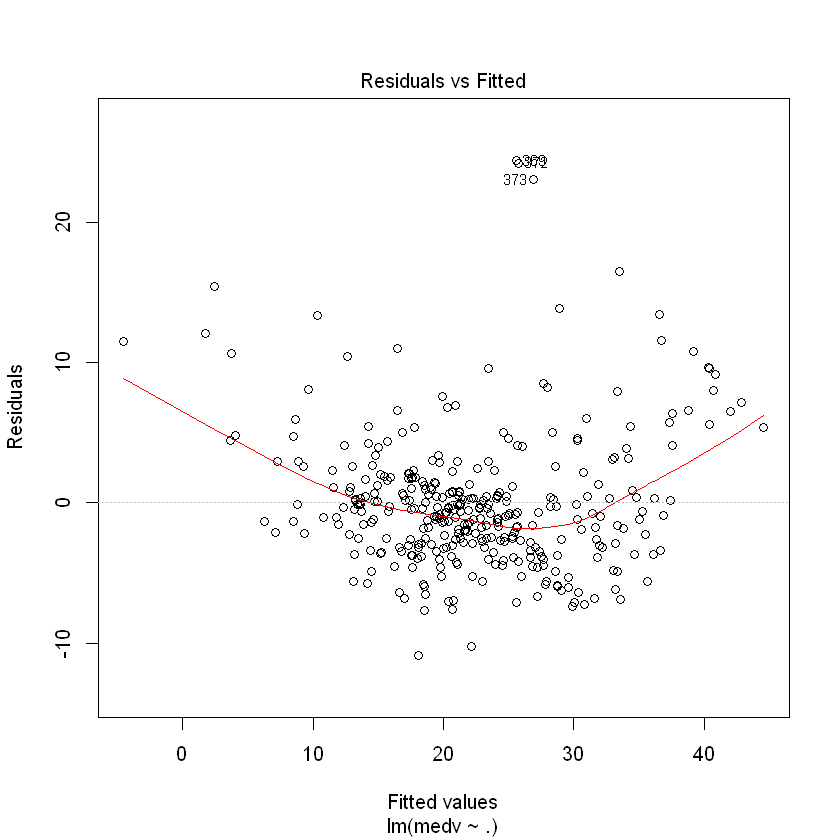

In [38]:
plot(lm.fit, which = c(1))

 데이터가 수집될 때, 시간 간격을 두고 계속적으로 수집될 경우 $\varepsilon_i$들이 서로 독립적이지 않고 자기상관성(autocorrelation)을 가질 수가 있다. <code>car</code> 패키지의 durbin-Watson 검정으로 독립성을 판단할 수 있다. 이 함수의 결과가 유의하게 나온다면 자기상관성이 있다고 판단할 수 있다.

In [25]:
durbinWatsonTest(lm.fit)

 lag Autocorrelation D-W Statistic p-value
   1      0.06704547      1.860615   0.194
 Alternative hypothesis: rho != 0

## 선형성
<code>car</code> 패키지의 <code>crPlots()</code> 함수를 사용해 선형성을 확인할 수 있다.

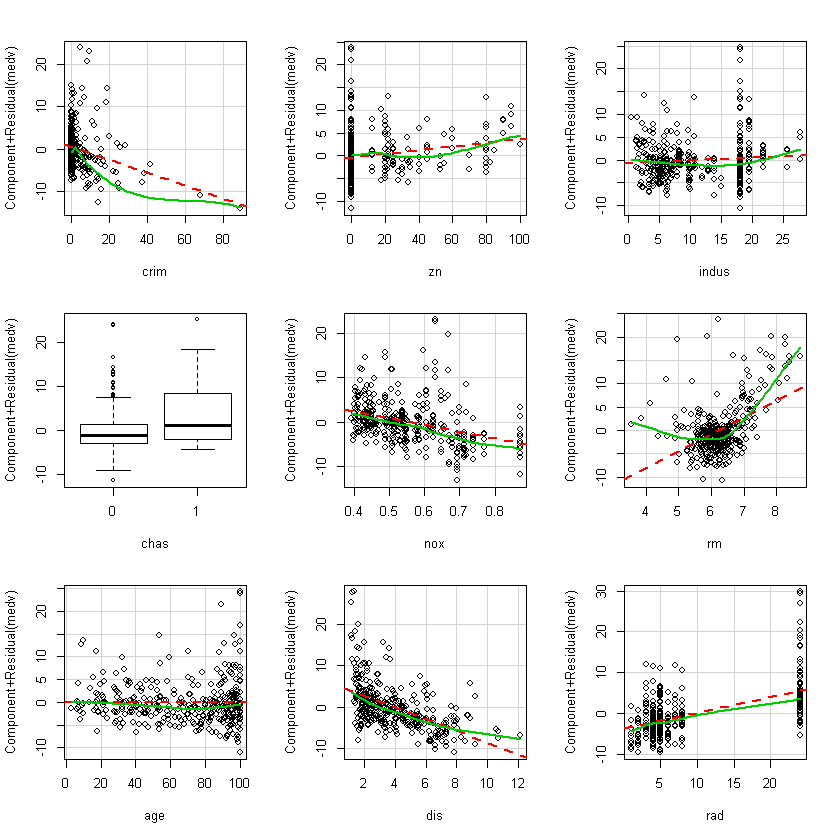

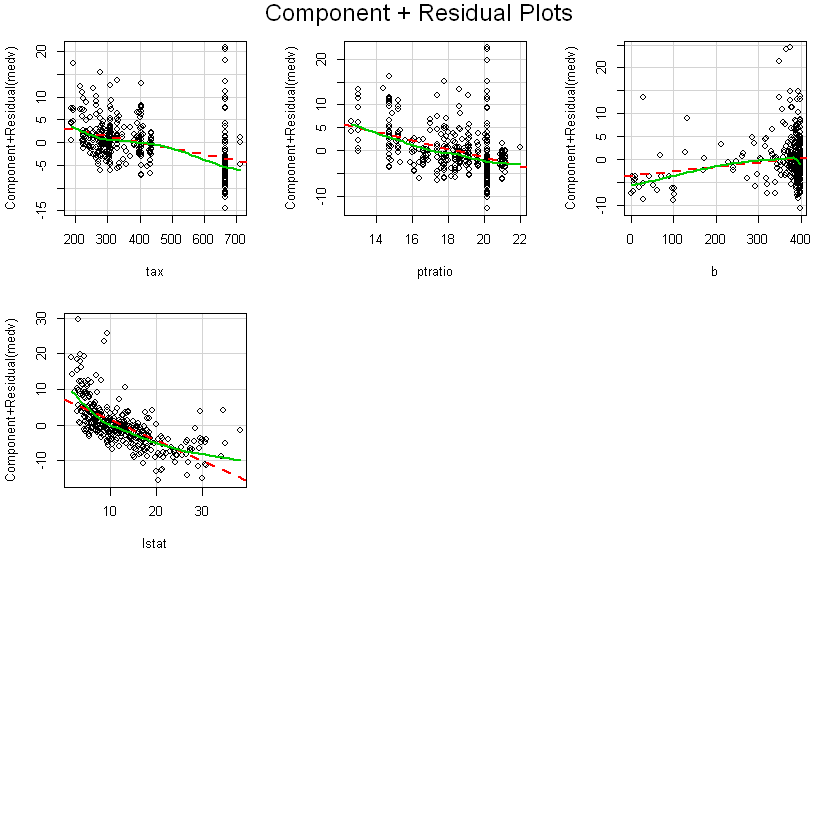

In [5]:
crPlots(lm.fit)

위의 plot들에서 비선형성이 관찰된다면 변수 변환을 하거나 비선형 회귀 모형을 사용해야 한다.

## 등분산성
선형 회귀에서는 $\varepsilon_i$들의 분산이 모두 같아야 한다. 등분산성을 만족하면, 수평선 주위에 Random Band 형태로 어떤 관계가 보이지 않는다. 만약 등분산성 가정이 위배된다면 변수 변환을 통해서 독립 변수들을 변환시켜서 회귀 모델에 적용해야 한다.

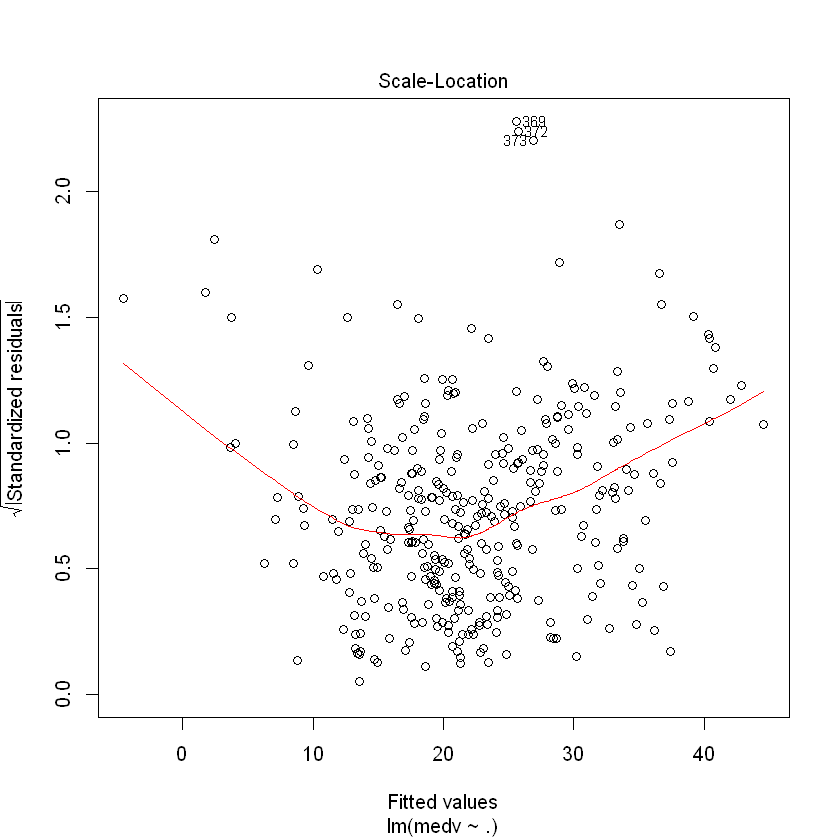

In [34]:
plot(lm.fit, which = c(3))

<code>car</code> 패키지의 <code>ncvTest()</code> 함수는 예측값에 따라 오차의 분산이 변하는지를 검정해주는 함수이다. 이 함수의 결과가 유의하게 나온다면 등분산성 가정이 위배된다고 할 수 있다.

In [28]:
ncvTest(lm.fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 7.356721    Df = 1     p = 0.006681252 

## 다중공선성(Multicolinearity)
다중공선성이란, 설명 변수들 간에 강한 상관관계가 나타나는 문제이다. 다중공선성이 있는 경우, 회귀 계수의 변동성이 커져 통계량과 모수가 서로 반대 부호를 가질 수 있다. 다중공선성은 분산팽창계수(Variance Inflation Factor, VIF)를 통해 확인할 수 있는데, 일반적으로 VIF 값이 10을 넘으면 의심의 여지가 있다.

In [14]:
print(vif(lm.fit))

    crim       zn    indus     chas      nox       rm      age      dis 
2.295084 2.423331 4.375690 1.124758 4.450116 2.081634 3.401537 4.246351 
     rad      tax  ptratio        b    lstat 
7.165530 8.464767 1.823889 1.388059 3.440503 


# 회귀 계수 추정
최소제곱법(Ordinary Least Squares, OLS)은 가장 기본적인 회귀 계수를 추정하는 방법으로 실제 관측값($y_i$)과 예측값($\hat{y_i}$)과의 차이를 최소로 하는 회귀 계수($\beta$, $W$)를 추정하는 방법이다. 잔차에는 $\pm$부호가 있으므로 각 잔차를 제곱하여 더한 합을 최소로 하는 회귀 계수를 추정한다.
$$ \text{잔차제곱합(Residual Sum of Squares, RSS) : } \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^k \beta_jx_{ij})^2$$
최소제곱법 이외에 일반화 최소제곱법, 최우추정법, 도구변수 추정법 등 회귀 계수를 추정하는 여러 방법이 있다. 어떤 방법을 쓰는 것이 좋은가는 결국 모집단에 대해 어떤 가정을 할 수 있는가에 달려있다.

## 경사하강법(Gradient Descent)

회귀 계수 $\beta$를 구하기 위해 회귀 함수의 표현식을 바꿔보면, $y = H(X) = W^TX + b = w_1x_1 + w_2x_2 + \cdots + w_kx_k + b$로 표현할 수 있다.  
이 때, W는 회귀 계수 벡터(가중치 벡터) $W = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_k \end{bmatrix}$이고,  
X는 입력 데이터 행렬 $X = \begin{bmatrix} x_1 & x_2 & \cdots & x_n\end{bmatrix} = \begin{bmatrix} x_{11} & x_{21} & \cdots & x_{n1} \\ x_{12} & x_{22} & \cdots & x_{n2} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1k} & x_{2k} & \cdots & x_{nk} \end{bmatrix}$이다.  
이 회귀 함수 $H(X)$에 대해, 잔차제곱합을 비용 함수(cost function) 혹은 손실 함수(loss function)라고 부른다. 
$$cost(W) = \frac{1}{m}\sum_{i=1}^m (H(x_i) - y_i)^2$$

### 정규방정식(Normal Equation)
경사하강법을 보기 전에 정규방정식이란 것을 봐보자. 정규방정식이란 위의 비용 함수를 최소화하는 $W$를 찾기 위한 해석적 방법으로, 비용 함수를 $W$에 대해 정리한 식이다.
$$\hat{W} = (X^T\cdot X)^{-1}\cdot X^T \cdot y$$
다음의 예시에서 확인해보자.

(Intercept)           x 
  -6.428219   12.156948 


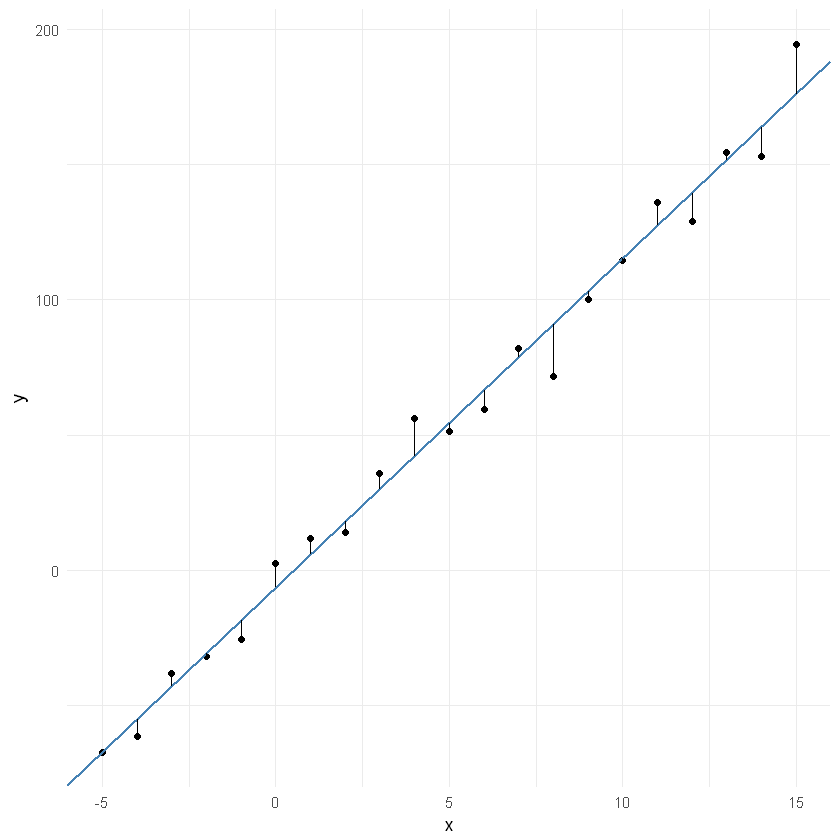

In [28]:
# Set seed
set.seed(2845)

# Generate data
x <- seq(-5, 15, 1)
y <- 12*x - 7 + rnorm(21, 0, 10)
lm.df <- data.frame(x = x, y = y)

# Train
lm.fit <- lm(y ~ x, lm.df)
print(lm.fit$coefficients)

# Plot
ggplot(lm.df, aes(x, y)) + geom_point() + theme_minimal() + 
geom_abline(intercept = lm.fit$coefficients[1], slope = lm.fit$coefficients[2], col = "steelblue", size = 0.8) +
geom_segment(aes(x, lm.fit$coefficients[2]*x + lm.fit$coefficients[1], yend = y, xend = x)) 

위의 예시에서, x와 y는 선형 관계로 표현될 수 있고 실제 $W = \begin{bmatrix} 12 \\ -7 \end{bmatrix}$이다. 그렇다면 정규방정식을 적용해 x의 회귀 계수 $\hat{W}$를 구해보자.

In [29]:
# Transform to matrix for normal equation
x_mat <- matrix(x) %>% cbind(rep(1, length(x)))
y_mat <- matrix(y)

# Weight
print(solve(t(x_mat) %*% x_mat) %*% (t(x_mat) %*% y_mat))

          [,1]
[1,] 12.156948
[2,] -6.428219


$\hat{W} = \begin{bmatrix} 12.156948 \\ -6.428219 \end{bmatrix}$로 실제 $W = \begin{bmatrix} 12 \\ -7 \end{bmatrix}$와 유사하지만 노이즈 때문에 정확한 회귀 계수를 찾지는 못했다.

정규방정식은 $(n + 1) \times (n + 1)$ 크기의 $X^T \cdot X$의 역행렬을 계산하기 때문에 변수의 수가 증가할수록 계산 복잡도가 굉장히 증가한다. 일반적으로 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$사이로, 변수의 수가 2배로 증가하면 계산 시간이 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배로 증가한다.

### 경사하강법(Gradient Descent)
경사 하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 방법으로 다음과 같은 순서로 진행된다.
1. 임의로 W의 값을 설정(random initialization)
2. 한 번에 조금(Learning rate)씩 비용 함수가 감소되는 방향($W$ 대해 편미분)으로 진행
3. 알고리즘이 최소값(Local minimum)에 수렴(Converge)될 때까지 점진적으로 향상

계산의 편의를 위해 cost function을 약간 변형하여 사용한다.
$$cost(W) = \frac{1}{m}\sum_{i=1}^m (H(x_i) - y_i)^2$$
$$\Downarrow$$
$$cost(W) = \frac{1}{2m}\sum_{i=1}^m (H(x_i) - y_i)^2$$

비용 함수를 $W$에 대해 편미분한 방향으로 사전에 정의한 learning rate(또는 step size)만큼 $W$를 이동시키면서 비용 함수를 감소시킨다.
$$W := W - \alpha \frac{\partial}{\partial W}cost(W), \text{ } \alpha \text{ : learning rate}$$
$$\Downarrow$$
$$W := W - \alpha \frac{\partial}{\partial W}\frac{1}{2m}\sum_{i=1}^m (Wx_i - y_i)^2$$
$$\Downarrow$$
$$W := W - \alpha \frac{1}{2m}\sum_{i=1}^m 2(Wx_i - y_i)x_i$$
$$\Downarrow$$
$$W := W - \alpha \frac{1}{m}\sum_{i=1}^m (Wx_i - y_i)x_i$$

![경사하강법](https://www.dropbox.com/s/koln95uz33729c3/gradient%20descent.jpg?raw=1)
<center>[이미지 출처](http://gdyoon.tistory.com/9)</center>  
비용 함수의 W에서의 기울기($\frac{\partial}{\partial W}cost(W)$)가 음수(빨간 선)이면 $W$는 학습률(learning rate)배 만큼 증가하고 양수이면 학습률 배 만큼 감소하면서 비용 함수가 최소가 되는 지점을 찾는다. 다음 예시를 보자.

In [30]:
# Set seed
set.seed(1990)

# Initialize w randomly
w <- sample(-100:100, 2) %>% matrix(nrow = 2)
previous_cost <- NULL
learning_rate <- 0.01
epsilon <- 0.00001

cost_list <- c()
w1_list <- c()
w2_list <- c()
for (i in 1:10000) { # Iterate 10000 times
    y_hat <- w[1]*x + w[2] # Predict y
    cost <- sqrt(mean((y_hat - y)^2)) # Calculate cost
    
    if (i > 1) { # Check after first prediction
        if (epsilon > abs(previous_cost - cost)) { # Break if cost change amount is less than threshold
            cat("Stop at iter", i, ", Cost change amount is less than threshold", "\n")
            break
        }
    }
    previous_cost <- cost # Change the previous cost
    cost_list <- c(cost_list, cost) # Reserve the cost
    
    # Update W
    w <- w - t(learning_rate / length(x) * ((t(w) %*% t(x_mat) - t(y_mat)) %*% x_mat))
    
    # Reserve the weights
    w1_list <- c(w1_list, w[1])
    w2_list <- c(w2_list, w[2])
}
# Print final weights
cat("Cost :", cost_list[length(cost_list)], "\n", "W1 :", w1_list[length(w1_list)], "\n", "W2 :", w2_list[length(w2_list)])

# Make dataframe for plotting
cost.df <- data.frame(iter = 1:length(cost_list), cost = cost_list, w1 = w1_list, w2 = w2_list)

Stop at iter 1040 , Cost change amount is less than threshold 
Cost : 8.659189 
 W1 : 12.14421 
 W2 : -6.272587

경사하강법을 통해 구한 회귀 계수는 $\hat{W} = \begin{bmatrix} 12.14421  \\ -6.272587 \end{bmatrix}$로 실제 $W = \begin{bmatrix} 12 \\ 7 \end{bmatrix}$와 유사하지만 노이즈 때문에 정확한 회귀 계수를 찾지는 못했다.

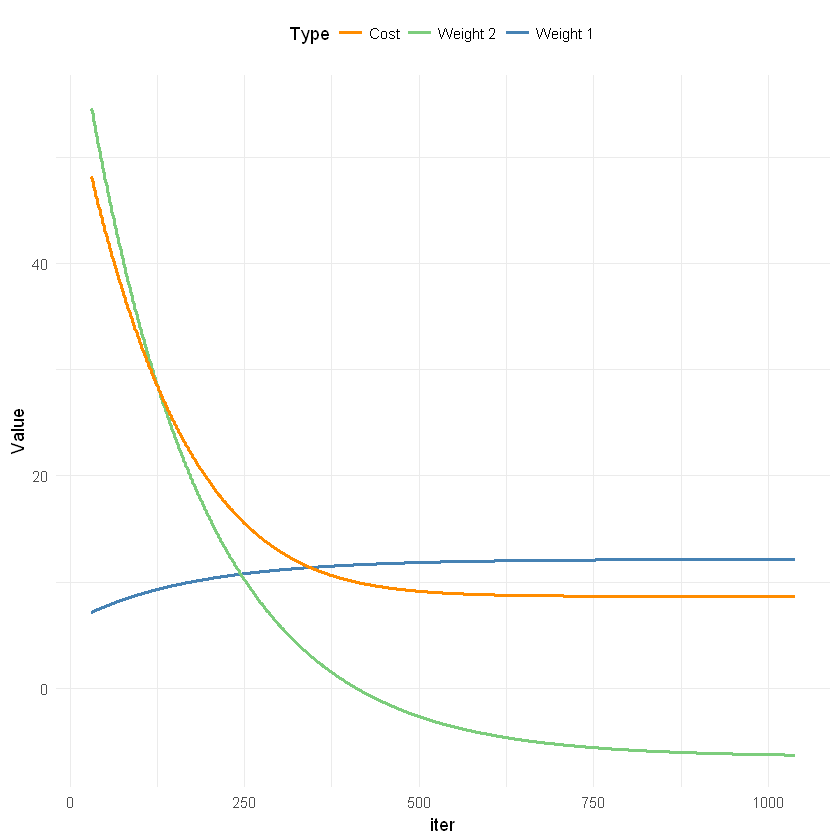

In [56]:
cost.df %>% filter(iter > 30) %>% 
ggplot() + geom_line(aes(iter, w1, col = 'steelblue'), size = 1) + 
geom_line(aes(iter, w2, col = 'palegreen3'), size = 1) + 
 geom_line(aes(iter, cost, col = 'darkorange'), size = 1) + 
ylab("Value") + theme_minimal() + scale_colour_manual(name = 'Type', 
                      values =c('steelblue'='steelblue','palegreen3'='palegreen3', 'darkorange'='darkorange'), 
                                                      labels = c('Cost', 'Weight 2', 'Weight 1')) +
theme(legend.position = "top")

##### learning rate, local minimum 설명할 것
선형 회귀에서 비용 함수가 convex problem이기 때문에 local minimum이 global minumun이 되는 것  

# 회귀 모형의 유의성 검정
최소제곱법에 의해서 회귀 계수를 추정하여 회귀 모형을 만들었다면, 이 모델이 얼마나 유의한지를 검정해야 한다.  

![Regression](https://www.dropbox.com/s/2z1a7amv78qs6dg/regression%20test.png?raw=1)
* 종속 변수의 총 변동(총제곱합, SST) = $\sum(y_i - \bar{y})^2$
* 회귀 직선에 의해 설명이 되는 변동(회귀제곱합, SSR) = $\sum(\hat{y_i} - \bar{y})^2$
* 회귀 직선에 의해 설명이 안되는 변동(잔차제곱합, SSE) = $\sum(y_i - \hat{y_i})^2 = \sum e_i^2$
$$SST = SSR + SSE$$

## 분산분석
회귀 모형 내의 모든 설명 변수들이 종속 변수와 선형 관계가 있는지를 검정해야 한다. 만약 모든 설명 변수들이 종속 변수에 영향을 미치지 않는다면 회귀 모형이 성립될 수 없으므로, 회귀 모형이 성립될 수 있는 최소의 요건을 갖추고 있는지를 검정할 필요가 있는데, 귀무 가설과 대립 가설은 다음과 같이 설정한다.

$$H_0 : \beta_1 = \beta_2 = \cdots = \beta_n = 0$$
$$H_1 : 적어도 하나의 \beta_i는 0이 아니다$$
만약 귀무 가설이 기각된다면 적어도 하나 이상의 설명 변수는 종속 변수에 대해 설명력이 있다는 것을 의미하므로 회귀 모형은 타당성을 갖게 된다.

설명 변수들이 종속 변수에 대해 설명력을 가지고 있다면 설명 변수들에 의해 설명되는 분산은 설명되지 않는 분산에 비해 상대적으로 클 것이다. 즉 회귀 직선에 의해 설명이 되는 회귀제곱합인 SSR과, 회귀 직선에 의해 설명이 안되는 잔차제곱합 SSE를 각각의 자유도로 나누어 분산을 구한 후 이 분산의 비율에 의해 계산된 F값으로 귀무가설의 기각 여부를 결정하게 된다. 추정된 회귀 모형 전체에 대한 검정은 분산분석표를 이용하여 F검정을 통해 수행한다.  

  |자유도|제곱합|제곱평균|F-통계량|P-value
--|------|------|--------|--------|--------
Regression|k|**SSR**|회귀제곱평균(MSR) : SSR/k | F비 : MSR/MSE | F-통계량의 유의확률(F분포표)
Residual|n-k-1|**SSE**|잔차제곱평균(MSE) : SSE/(n-k-1) |  | 
Total|n-1|**SST**|총제곱평균(MST) : SST/(n-1) |  | 
  


$$F = \frac{MSR}{MSE} = \frac{(SST-SSE)/k}{SSE/(n-k-1)}, \text{ } k : 변수의 수, \text{ } n : 데이터의 수$$

<code>lm()</code>함수를 통해서 만든 회귀 모형의 검정 결과는 <code>summary()</code>함수로 확인할 수 있다.

In [7]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3555  -2.5758  -0.5061   1.6271  23.9439 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.891455   6.114600   4.889 1.57e-06 ***
crim         -0.056719   0.052701  -1.076 0.282584    
zn            0.032611   0.015738   2.072 0.039000 *  
indus         0.020977   0.074259   0.282 0.777739    
chas1         3.523469   0.993306   3.547 0.000444 ***
nox         -18.008866   4.421189  -4.073 5.77e-05 ***
rm            4.508164   0.503789   8.949  < 2e-16 ***
age          -0.006882   0.015732  -0.437 0.662048    
dis          -1.449277   0.240319  -6.031 4.26e-09 ***
rad           0.218833   0.075969   2.881 0.004221 ** 
tax          -0.009500   0.004261  -2.230 0.026433 *  
ptratio      -0.856761   0.152946  -5.602 4.39e-08 ***
b             0.009288   0.003333   2.787 0.005625 ** 
lstat        -0.486639   0.063911  -7.614 2.65e-13 ***
---
Signif. 

위 결과에서 F-statistic 부분을 보면 F-통계량이 78.93이고 p-value가 2.2e-16미만으로 유의 수준 0.05보다 훨씬 작아 이 모형은 적어도 하나의 설명 변수가 종속 변수와 선형 관계에 있다고 할 수 있다.

## 결정계수 $R^2$
최소제곱법에 의하여 추정된 회귀 모형이 종속변수의 변동을 어느정도로 잘 설명해주는가를 나타내는 지표이다. 전체 변동에서 회귀 직선에 의해 설명되는 변동의 비율이 어느정도인지를 나타낸다.
$$ R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}, (0 \le R^2 \le 1)$$
만약 $\beta_1 = \beta_2 = \cdots = \beta_n = 0$이어서 추정된 회귀 모델의 설명력이 전혀 없을 때는 $R^2 = 0$이 되고, 반대로 모든 $y_i$값들이 추정된 회귀 모델의 선 상에 위치하게 되면 $R^2 = 1$이 된다.

### 조정결정계수 $\text{Adj } R^2$
결정계수는 설명 변수의 수가 증가할 수록 그 값이 증가하게 된다. 그러나 무작정 설명 변수의 수를 늘려서 결정계수를 크게 하는 것은 항상 바람직한 것은 아니다. 왜냐하면 설명 변수의 수가 증가할 수록 모형의 복잡도가 높아질 뿐만 아니라, 설명 변수 간의 상관관계가 높아지게 되어 다중공선성의 문제가 발생하게 되고, 회귀 계수의 해석에 어려움이 따르게 되기 때문이다.  
따라서 설명 변수의 수를 고려해서 결정계수를 조정해야 한다.
$$\text{Adj }R^2 = 1 - (1 - R^2)\frac{n-1}{n-k-1}$$

<code>lm()</code>함수를 통해서 만든 회귀 모형의 결정 계수는 <code>summary()</code>함수로 확인할 수 있다.

In [22]:
cat("결정계수 :", summary(lm.fit)$r.squared, "\n", "조정 결정계수 :", summary(lm.fit)$adj.r.squared)

결정계수 : 0.7511206 
 조정 결정계수 : 0.7416046

## 회귀 계수 검정
회귀 모형 전체에 대한 검정뿐 아니라 하나의 설명 변수에 대한 검정 또한 필요하다.  추정된 회귀 계수 $\beta_i$가 에 대한 검정을 위해 다음과 같이 귀무 가설과 대립 가설을 설정한다.
$$H_0 : \beta = 0$$
$$H_a : \beta \ne 0$$
이 회귀 계수에 대한 검정은 자유도 k-n-1의 t-분포를 이용한다. p-value는 귀무가설이 맞다는 가정하에 주어진 $\beta_i$ 가 나올 확률로, 일반적으로 p-value < 0.05이면 귀무가설 하에서 그러한 검정통계량의 값을 얻게될 가능성이 5%이하를 의미하므로 추정된 $\beta$의 값이 유의하다고 판단한다.
<code>lm()</code>함수를 통해서 만든 회귀 모형의 회귀 계수 검정 결과는 <code>summary()</code>함수로 확인할 수 있다.

In [25]:
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3555  -2.5758  -0.5061   1.6271  23.9439 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.891455   6.114600   4.889 1.57e-06 ***
crim         -0.056719   0.052701  -1.076 0.282584    
zn            0.032611   0.015738   2.072 0.039000 *  
indus         0.020977   0.074259   0.282 0.777739    
chas1         3.523469   0.993306   3.547 0.000444 ***
nox         -18.008866   4.421189  -4.073 5.77e-05 ***
rm            4.508164   0.503789   8.949  < 2e-16 ***
age          -0.006882   0.015732  -0.437 0.662048    
dis          -1.449277   0.240319  -6.031 4.26e-09 ***
rad           0.218833   0.075969   2.881 0.004221 ** 
tax          -0.009500   0.004261  -2.230 0.026433 *  
ptratio      -0.856761   0.152946  -5.602 4.39e-08 ***
b             0.009288   0.003333   2.787 0.005625 ** 
lstat        -0.486639   0.063911  -7.614 2.65e-13 ***
---
Signif. 

위 결과에서 Coefficients 부분을 보면 각 설명 변수 별로 p-value 값을 확인할 수 있다. <code>crim</code>변수의 경우 p-value가 0.282584로 유의 수준 0.05보다 커서 유의하지 않은 변수라고 할 수 있다. 반면에 <code>lstat</code>변수는 p-value가 2.65e-13으로 유의 수준보다 훨씬 작아 유의한 변수라 할 수 있다.

# 회귀 모형의 교정
회귀 모형의 유의성 검정, 가정 검토를 통해서 문제가 발견되었을 경우, 다음과 같은 방법을 통해 교정할 수 있다.
* 이상치 제거 : 일반적으로 모형을 만들기 전 EDA 과정에서 이상치를 제거하는 경우가 많은데, 회귀 모형을 만든 후에 영향 관측치가 발견되었다면 제거할 수 있다. 그러나 관측치를 제거하는 것은 항상 매우 주의해서 진행해야 한다.
* 변수 변환 : 회귀 모형이 선형성, 등분산성 등의 가정을 만족하지 않을 때 변수 변환을 통해 그 가정을 만족시킬 수도 있다.
* 변수 선택 : 전체 변수를 전부 사용하는 것이 아니라 유의하지 않은 변수, 다중공선성 등을 고려해서 모형을 만든다.
* 다른 회귀 방법 사용 : 종속 변수와 설명 변수들 간에 선형 관계가 아닌 비선형 관계일 경우, 비선형회귀 모형을 사용하는 것이 좋다.

선형 회귀 모형는 <code>step()</code>함수를 사용해 변수를 선택할 수 있다. <code>step()</code>함수는 AIC 값을 이용해 단계적으로 회귀를 수행하면서 더 나은 변수 조합을 찾는다.
* 전진선택법(Forward) : 변수가 없이 시작해서 p-value 값이 가장 작은 변수부터 하나씩 추가하는 방법
* 후진제거법(Backward) :모든 변수를 포함한채 시작해서 하나씩 p-value 값이 가장 큰 변수부터 제거하는 방법

In [51]:
fwd.fit <- step(lm(medv ~ 1, train), 
                scope = (medv ~ crim + zn + indus + 
                         chas + nox + rm + age + dis + 
                         rad + tax + ptratio + b + lstat), 
                direction = "forward",
                trace = 1)

Start:  AIC=1560.04
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   16191.4 12678 1270.7
+ rm       1   15308.1 13562 1294.6
+ ptratio  1    7299.4 21570 1458.9
+ indus    1    6409.3 22460 1473.2
+ tax      1    6342.0 22528 1474.2
+ nox      1    5177.3 23692 1492.1
+ crim     1    4779.2 24090 1498.0
+ age      1    4350.8 24519 1504.2
+ rad      1    4229.0 24641 1506.0
+ zn       1    3524.7 25345 1516.0
+ b        1    2659.6 26210 1527.8
+ dis      1    2007.2 26862 1536.5
+ chas     1    1019.3 27850 1549.3
<none>                 28870 1560.0

Step:  AIC=1270.73
medv ~ lstat

          Df Sum of Sq     RSS    AIC
+ rm       1   3065.84  9612.4 1174.7
+ ptratio  1   1345.74 11332.5 1233.0
+ chas     1    651.93 12026.3 1254.0
+ dis      1    601.95 12076.2 1255.5
+ age      1    335.23 12343.0 1263.2
<none>                 12678.2 1270.7
+ tax      1     59.07 12619.1 1271.1
+ zn       1     44.23 12634.0 1271.5
+ b        1     28.93 12649.3 1271.9
+ nox      1    

In [53]:
bwd.fit <- step(lm(medv ~ ., train), 
                scope = (lower = medv ~ 1), 
                direction = "backward", 
                trace = 1)
summary(bwd.fit)

Start:  AIC=1093.7
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + b + lstat

          Df Sum of Sq    RSS    AIC
- indus    1      1.69 7186.7 1091.8
- age      1      4.04 7189.1 1091.9
- crim     1     24.48 7209.5 1092.9
<none>                 7185.0 1093.7
- zn       1     90.74 7275.8 1096.2
- tax      1    105.04 7290.1 1096.8
- b        1    164.10 7349.1 1099.7
- rad      1    175.35 7360.4 1100.2
- chas     1    265.90 7450.9 1104.6
- nox      1    350.63 7535.7 1108.6
- ptratio  1    663.12 7848.2 1123.0
- dis      1    768.56 7953.6 1127.7
- lstat    1   1225.21 8410.3 1147.4
- rm       1   1692.20 8877.2 1166.6

Step:  AIC=1091.79
medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + 
    ptratio + b + lstat

          Df Sum of Sq    RSS    AIC
- age      1      3.81 7190.5 1090.0
- crim     1     24.84 7211.6 1091.0
<none>                 7186.7 1091.8
- zn       1     89.06 7275.8 1094.2
- tax      1    122.86 7309.6 1095.8
- 


Call:
lm(formula = medv ~ zn + chas + nox + rm + dis + rad + tax + 
    ptratio + b + lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1532  -2.5170  -0.6073   1.6858  23.9016 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.132834   6.018328   4.841 1.96e-06 ***
zn            0.030731   0.015408   1.994 0.046890 *  
chas1         3.576418   0.979940   3.650 0.000303 ***
nox         -17.818002   4.087198  -4.359 1.73e-05 ***
rm            4.489725   0.487361   9.212  < 2e-16 ***
dis          -1.396723   0.220980  -6.321 8.10e-10 ***
rad           0.184230   0.066091   2.788 0.005607 ** 
tax          -0.008666   0.003673  -2.359 0.018872 *  
ptratio      -0.848169   0.150875  -5.622 3.92e-08 ***
b             0.009987   0.003233   3.089 0.002173 ** 
lstat        -0.506699   0.057930  -8.747  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.586 on 343 degrees

BostonHousing 데이터에서는 forward와 backward 방법 모두 같은 변수들을 선택했다.

In [67]:
print(formula(fwd.fit))
print(formula(bwd.fit))

medv ~ lstat + rm + ptratio + dis + nox + chas + b + rad + tax + 
    zn
medv ~ zn + chas + nox + rm + dis + rad + tax + ptratio + b + 
    lstat


전체 변수를 넣은 모델과 forward, backward 방법을 사용한 모델들은 5-folds cross validation을 통해 RMSE를 구하면 다음과 같다.

In [68]:
# Set seed
set.seed(1990)

# Set parameters
kfolds <- 5
folds <- sample(cut(1:nrow(BostonHousing), breaks = kfolds, label = F))

# 5 folds cv
base.pred <- rep(0, nrow(BostonHousing))
fwd.pred <- rep(0, nrow(BostonHousing))
bwd.pred <- rep(0, nrow(BostonHousing))
for (k in 1:kfolds) {
    train.id   <- which(folds != k)
    train_fold <- BostonHousing[train.id,]
    test_fold  <- BostonHousing[-train.id,]
    
    base.fit  <- lm(medv ~ ., data = train_fold)
    fwd.fit <- step(lm(medv ~ 1, train), 
                    scope = (medv ~ crim + zn + indus + 
                             chas + nox + rm + age + dis + 
                             rad + tax + ptratio + b + lstat), 
                    trace = 0)
    bwd.fit <- step(lm(medv ~ ., train),
                    scope = (lower = medv ~ 1), 
                    direction = "backward", 
                    trace = 0)
    
    base.pred[-train.id]  <- predict(base.fit, test_fold)
    fwd.pred[-train.id]   <- predict(fwd.fit, test_fold)
    bwd.pred[-train.id]   <- predict(bwd.fit, test_fold)
}

step.df <- data.frame(method = c("base", "forward", "backward"), 
                     rmse = c(sqrt(mean((base.pred - BostonHousing$medv)^2)),
                              sqrt(mean((fwd.pred - BostonHousing$medv)^2)),
                              sqrt(mean((bwd.pred - BostonHousing$medv)^2))))
print(step.df)

    method     rmse
1     base 4.906078
2  forward 4.755408
3 backward 4.755408
